# understanding problem 

 - Objective: Predict whether an individual's income exceeds $50K/year (class: >50K) or is below or equal to $50K/year (class: <=50K).

- Age: Age of the individual.
- Workclass: The type of employer (Private, Self-Employed, Government, etc.).
- Education: The individual's highest level of education (e.g., Bachelors, Masters, etc.).
- Education-num: The numeric representation of the education level.
- Marital-status: Marital status (e.g., Married, Single, Divorced, etc.).
- Occupation: Occupation (e.g., Prof-specialty, Craft-repair, etc.).
- Relationship: Relationship status (e.g., Husband, Wife, Not-in-family, etc.).
- Race: Race of the individual.
- Sex: Gender of the individual.
- Capital-gain: Income from capital gains (e.g., stocks, investments).
- Capital-loss: Loss from capital investments.
- Hours-per-week: Number of hours worked per week.
- Native-country: Country of origin (e.g., United States, Mexico, etc.).

# Import library 

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
RANDOM_STATE = 42
import datetime as dt


# dataset

## load dataset 

In [2]:
dataset=pd.read_csv(r'C:\Users\lap shop\OneDrive\Documents\GDG\adult.csv')

## about dataset

In [3]:
dataset.head(40)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [4]:
dataset.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
dataset.shape

(48842, 15)

In [7]:
dataset.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
dataset.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [9]:
dataset.duplicated().sum()


52

In [10]:
dataset.drop_duplicates(inplace= True)


In [11]:
dataset

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# anyliys feats

## target 

In [12]:
dataset['income'].describe()

count     48790
unique        2
top       <=50K
freq      37109
Name: income, dtype: object

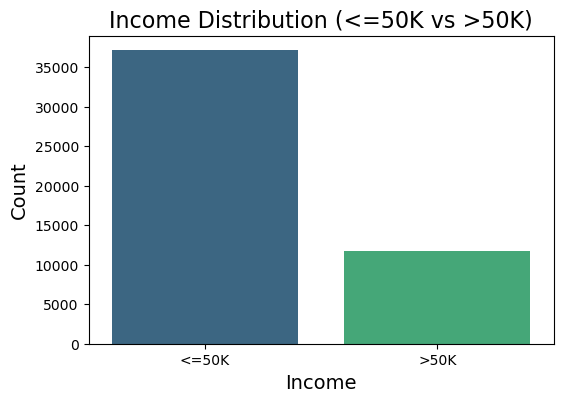

In [13]:
plt.figure(figsize=(6,4))

sns.countplot(x='income', data=dataset, palette='viridis')

plt.title('Income Distribution (<=50K vs >50K)', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()

- is implanced dataset 

In [14]:
dataset['income'] = dataset['income'].apply(lambda x: 1 if x == '>50K' else 0)


## numircal_coulmns 

In [15]:
numerical_cols= dataset.select_dtypes(exclude=object)


C:\Users\lap shop\AppData\Local\Temp\ipykernel_15592\264624390.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], ax=ax[0]).set(title="Distplot")
C:\Users\lap shop\AppData\Local\Temp\ipykernel_15592\264624390.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\lap shop\AppData\Local\Temp\ipykernel_15592\264624390.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `h

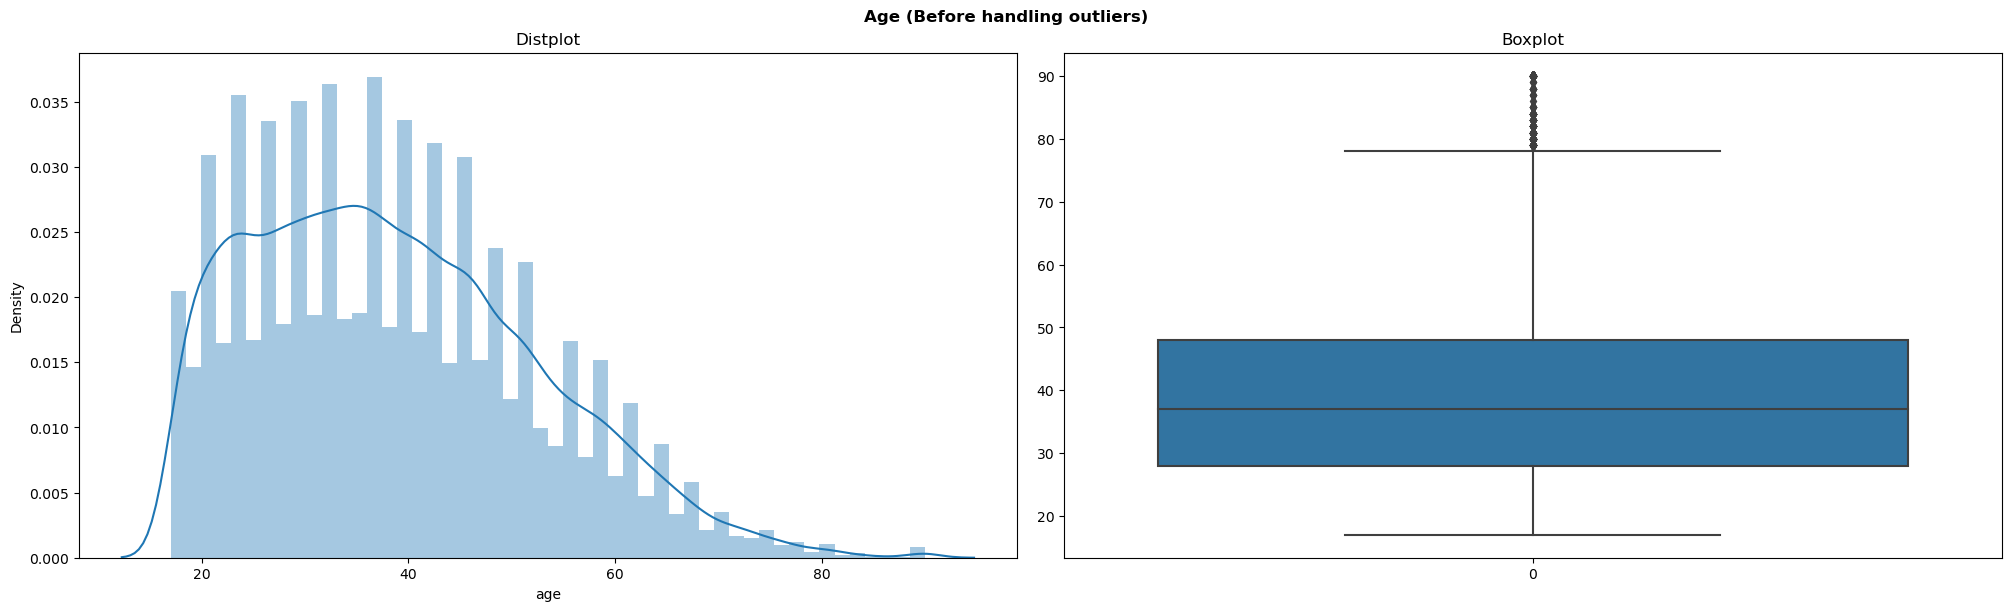

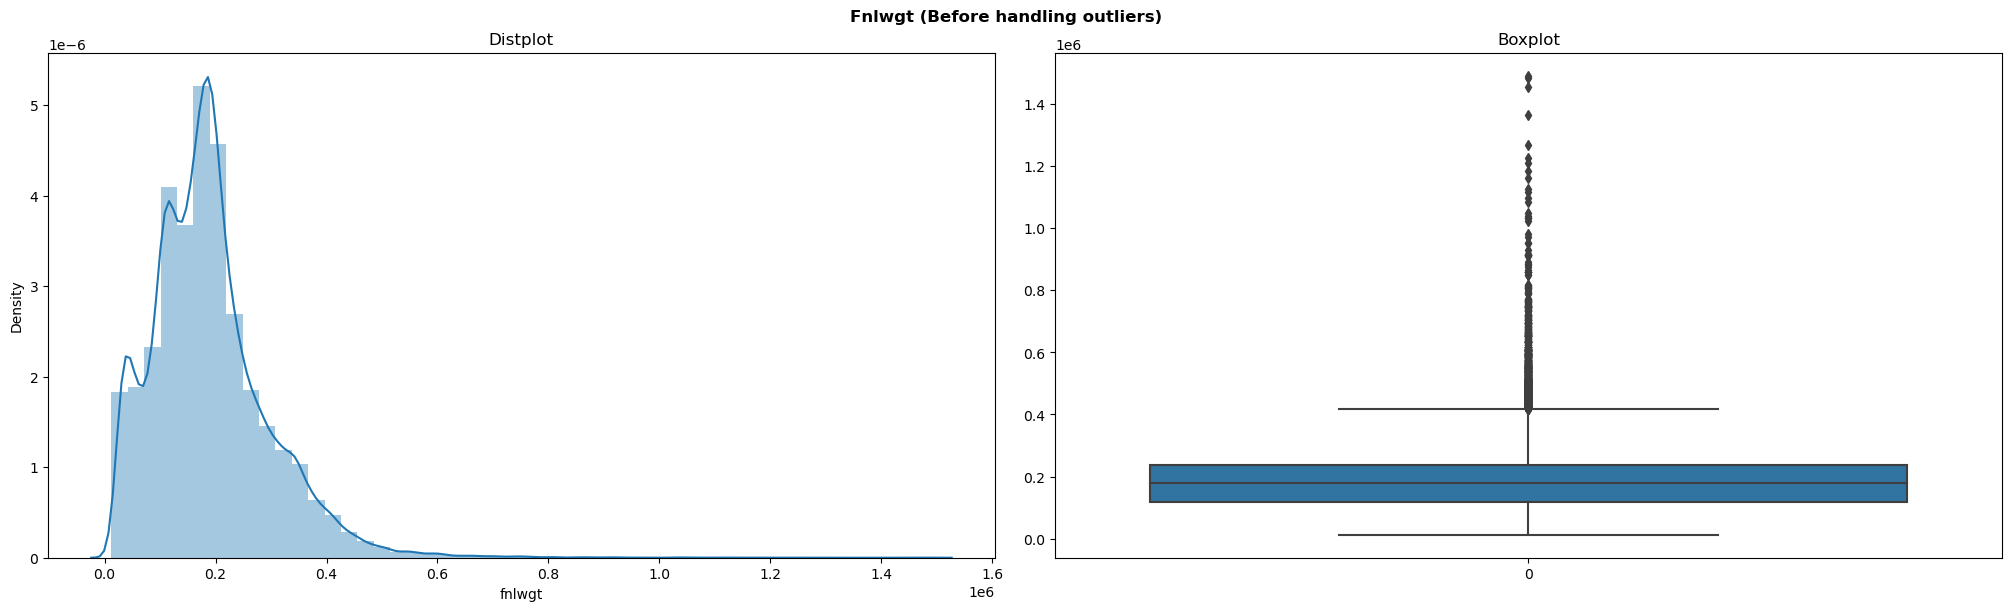

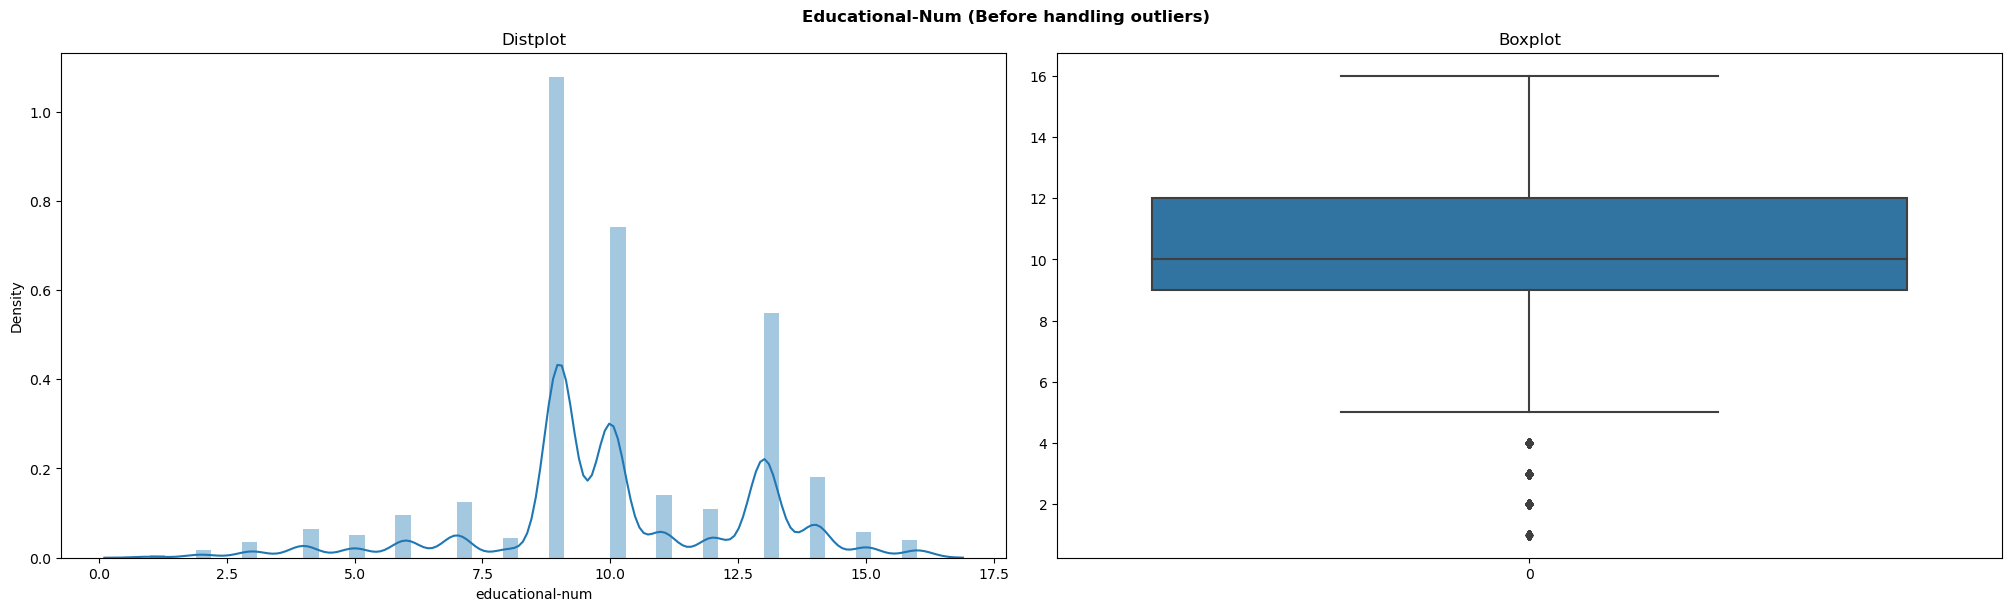

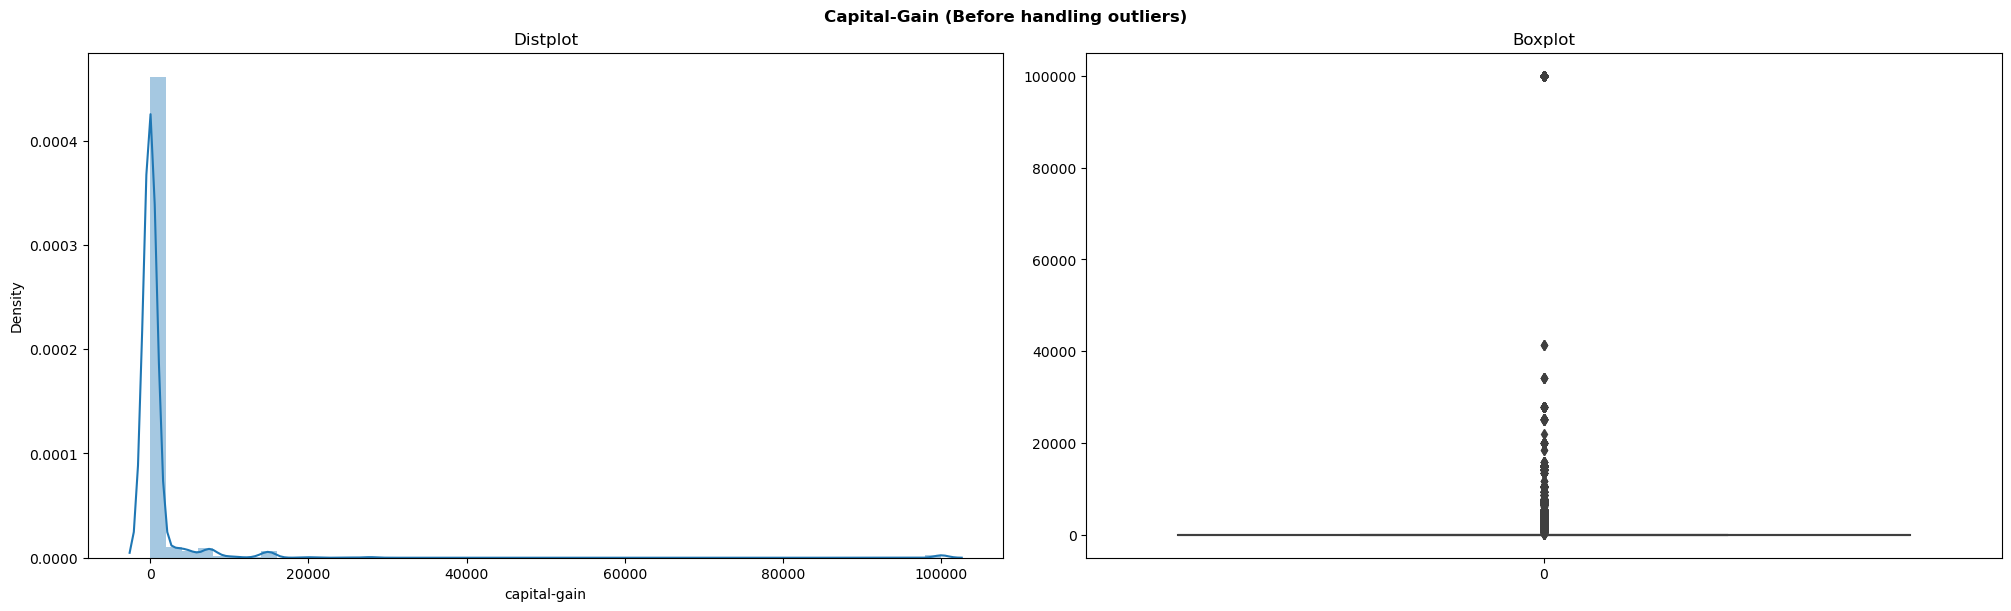

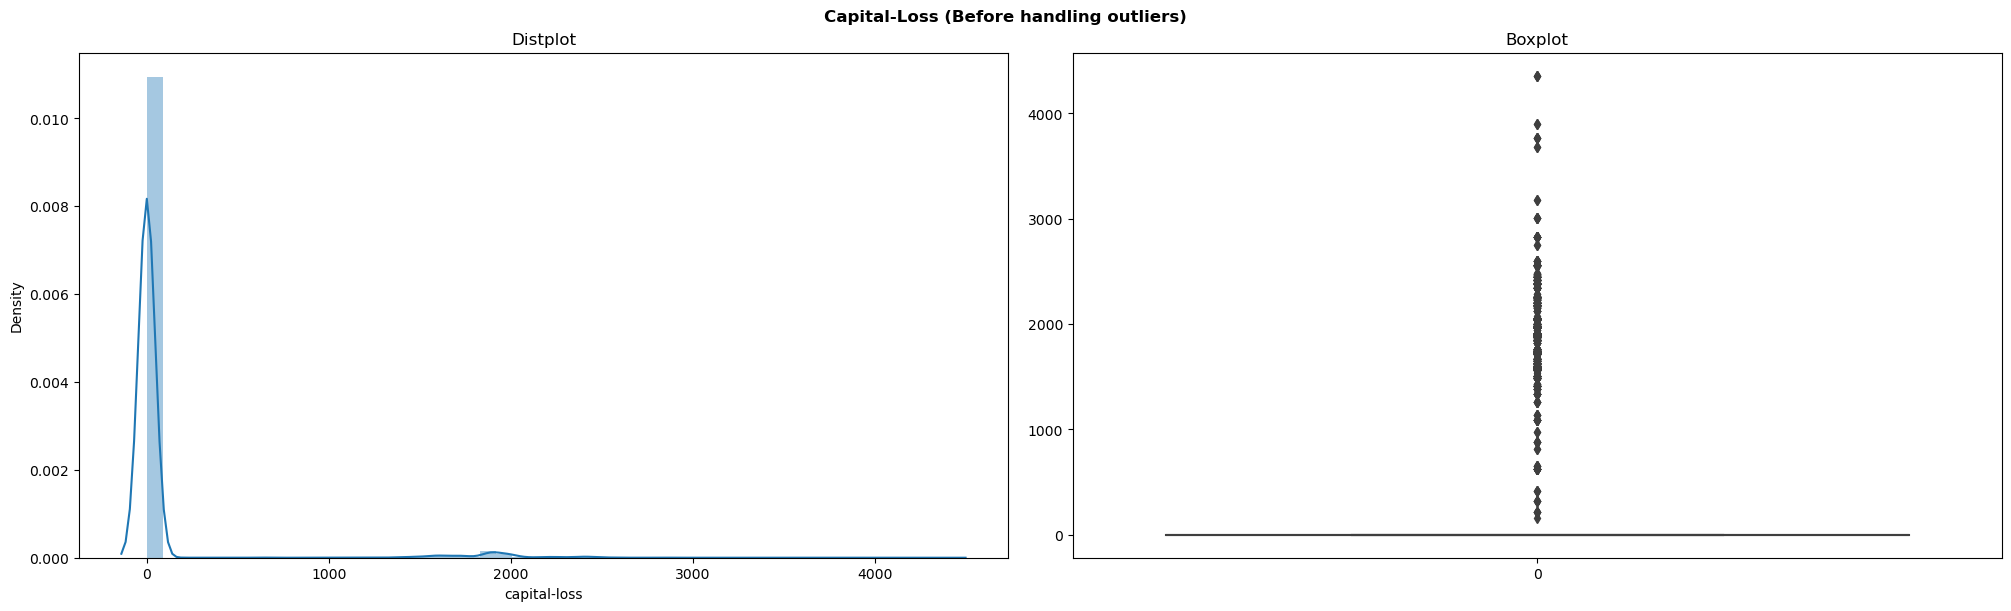

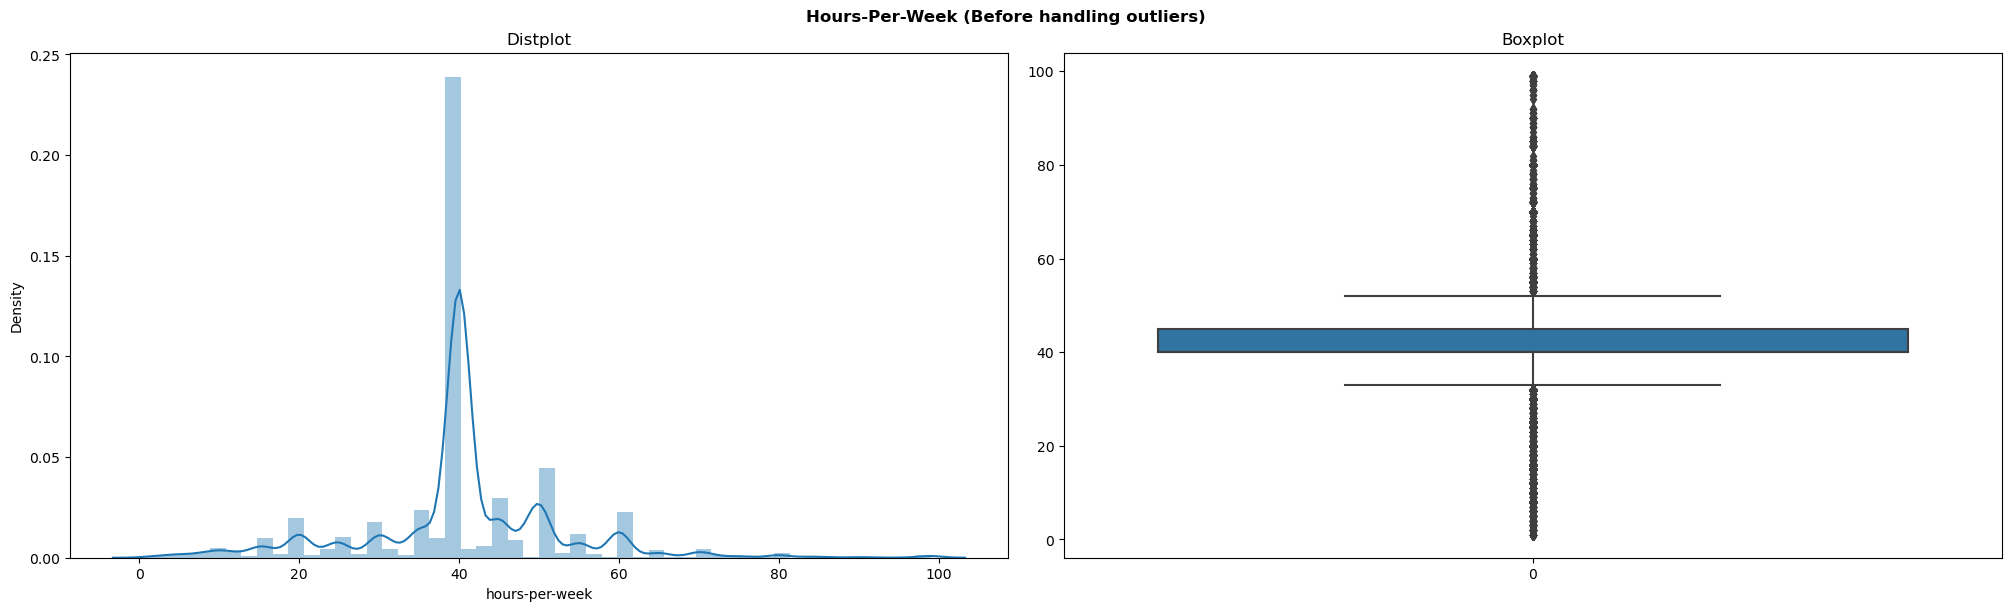

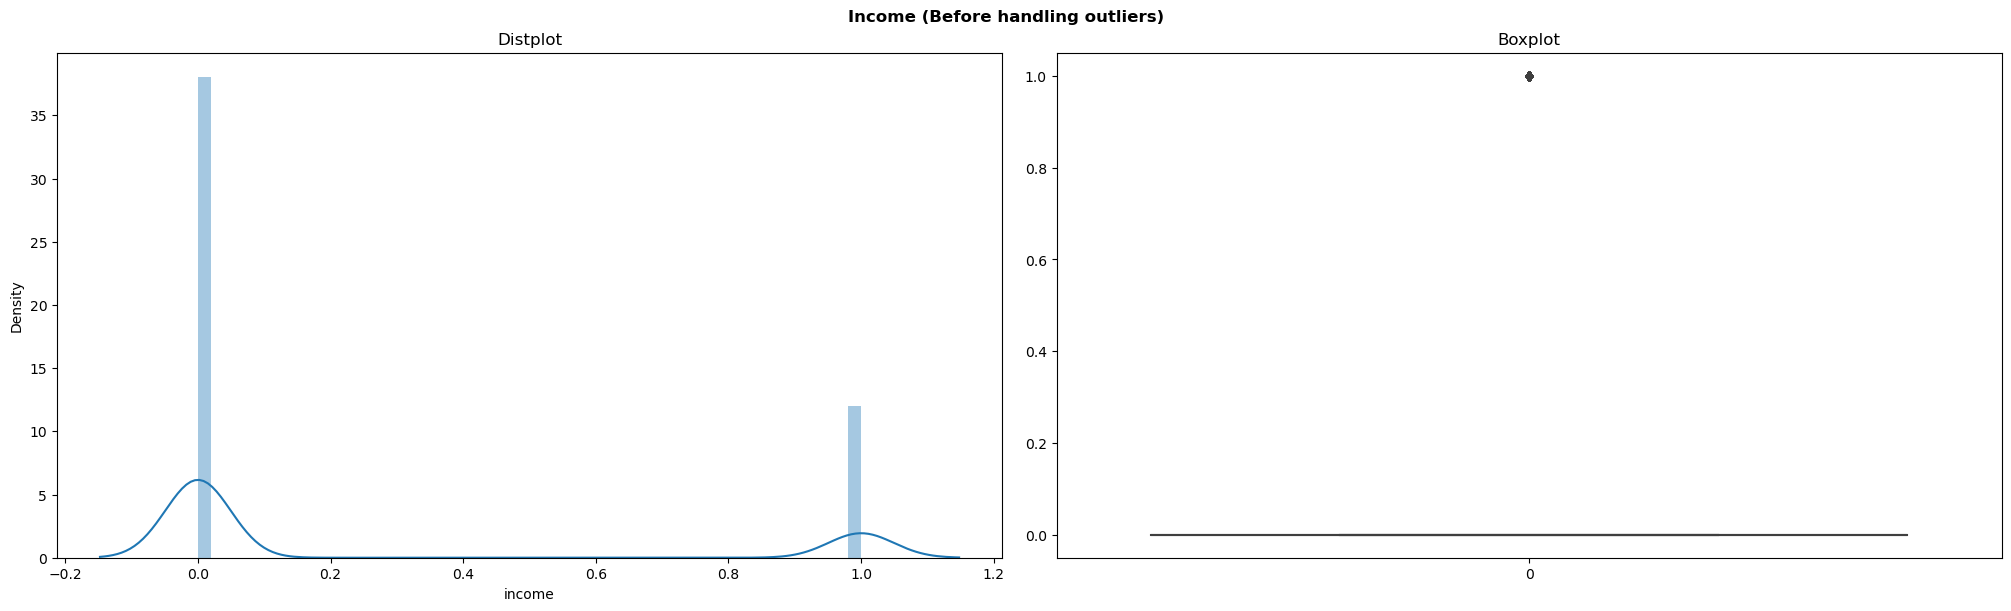

In [16]:
for col in numerical_cols:
    fig, ax =plt.subplots(1,2, constrained_layout=True)
    fig.set_size_inches(20, 6)
    sns.distplot(dataset[col], ax=ax[0]).set(title="Distplot")
    sns.boxplot(dataset[col], ax=ax[1]).set(title="Boxplot")
    plt.suptitle(f'{col.title()} (Before handling outliers)',weight='bold')
    fig.show()

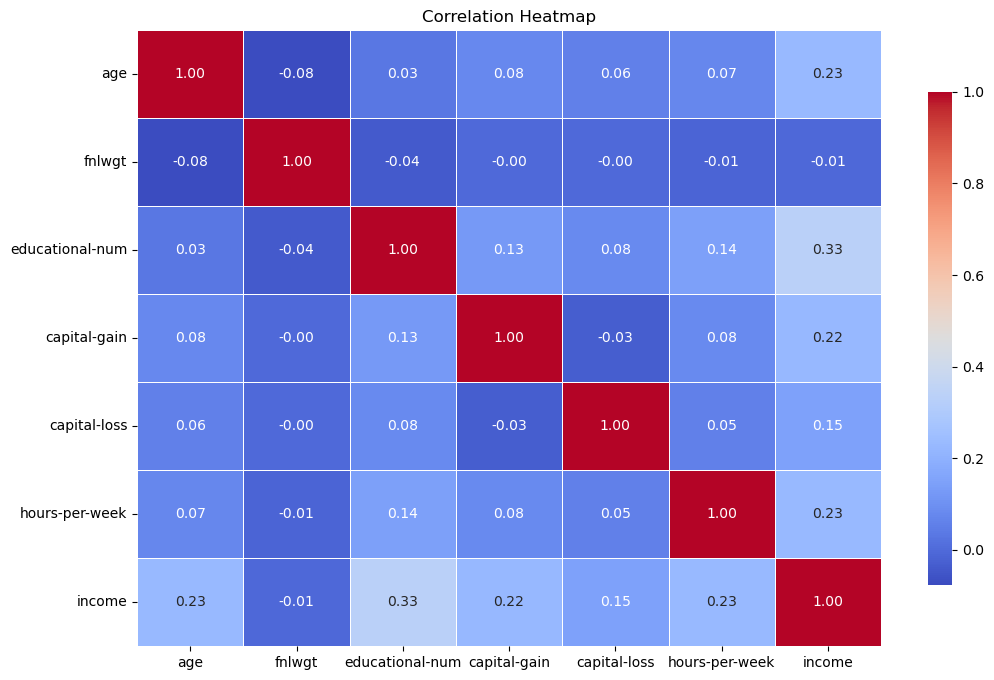

In [17]:
cor= dataset.select_dtypes(exclude=object).corr()
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(cor, annot=True, linewidths=0.6, cmap='coolwarm', cbar_kws={'shrink': 0.8}, fmt=".2f")

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

## cat feats

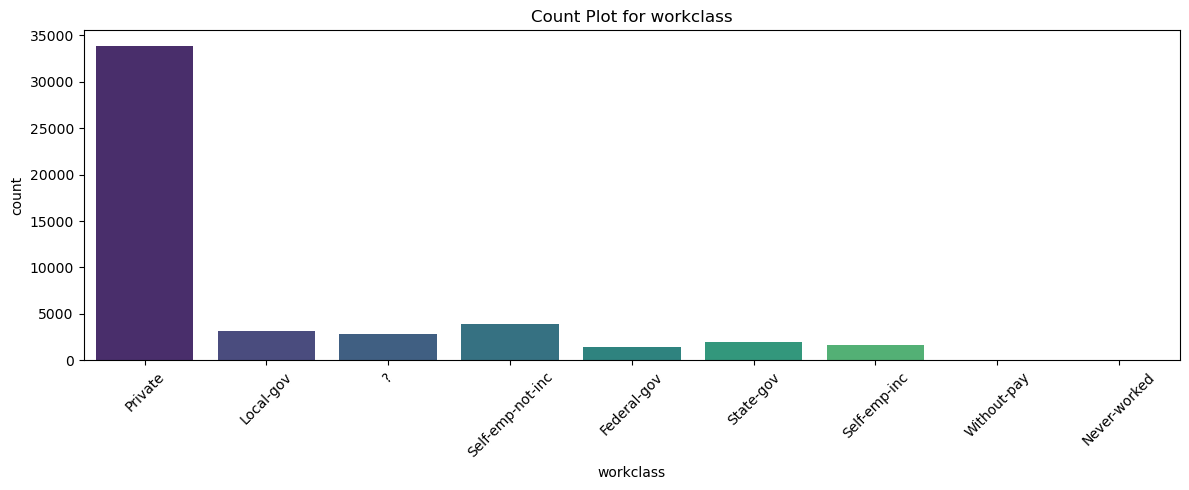

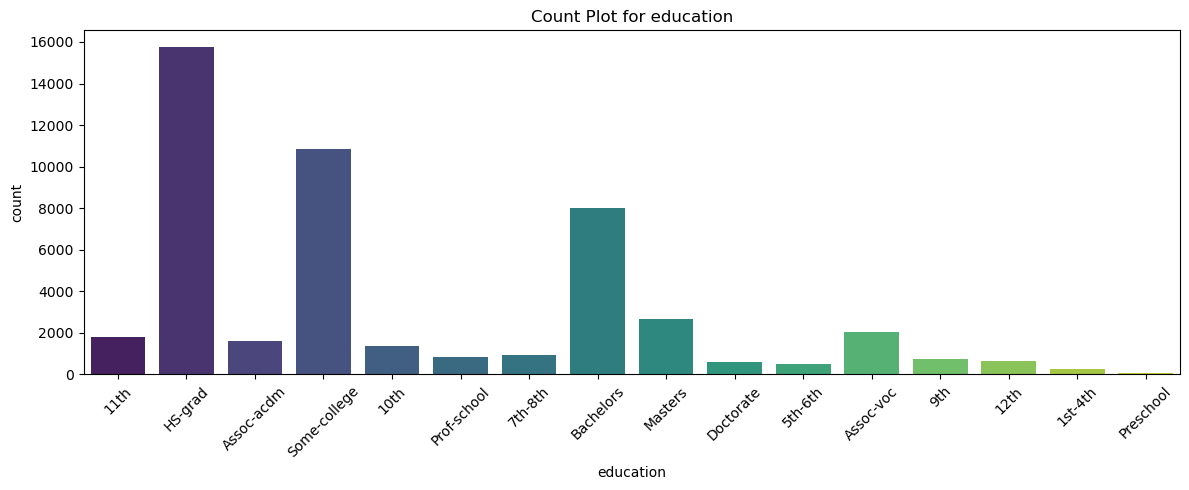

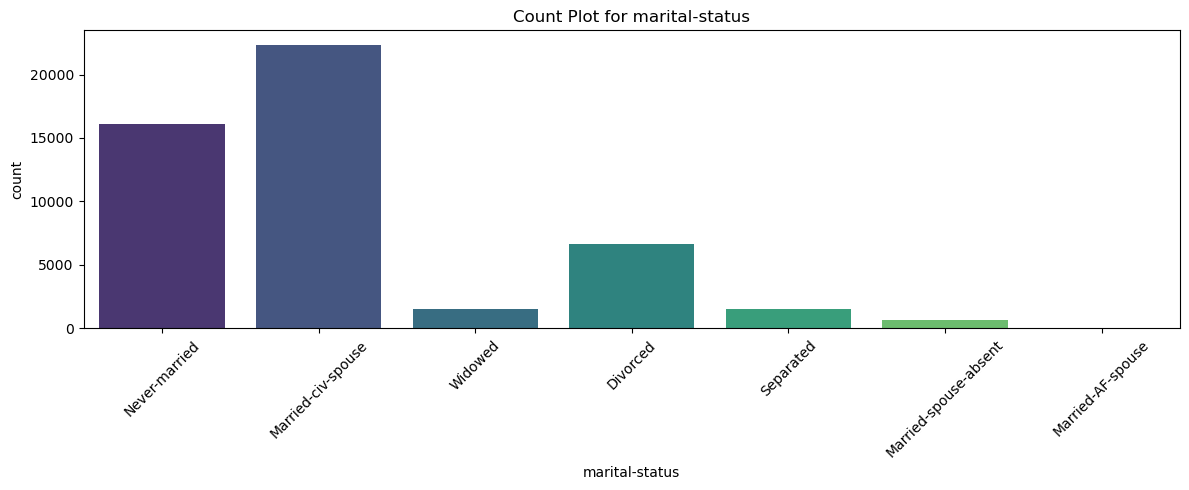

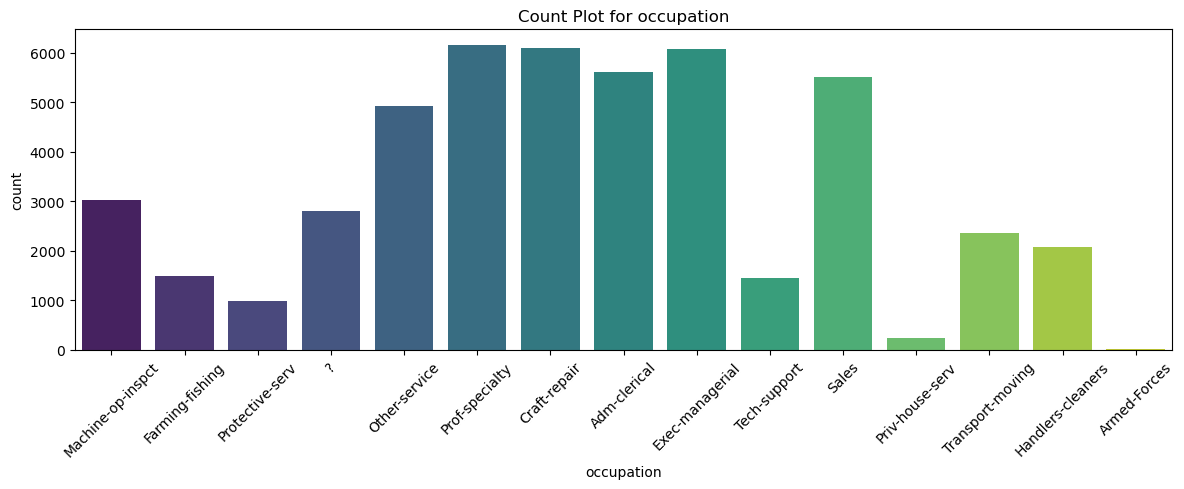

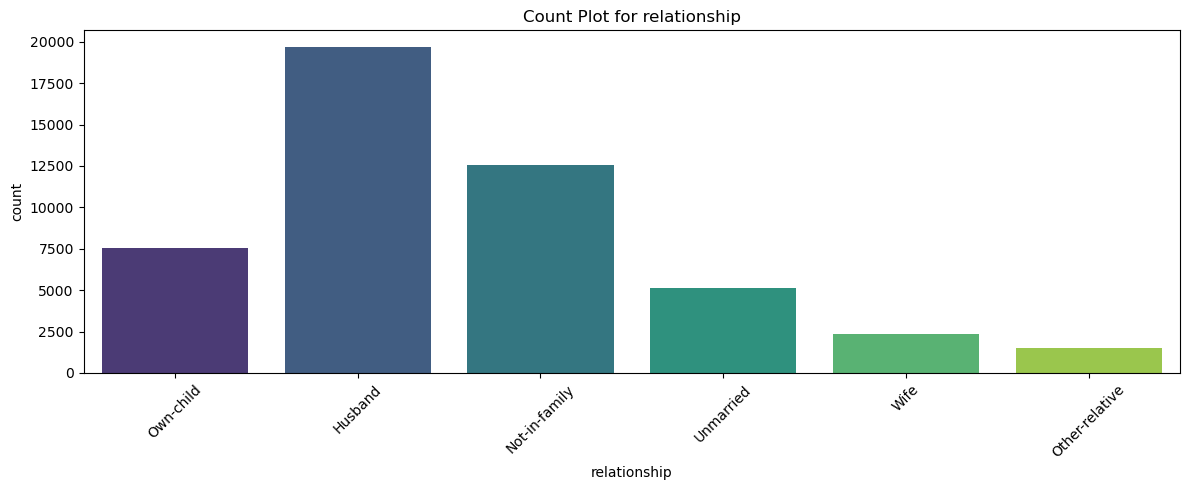

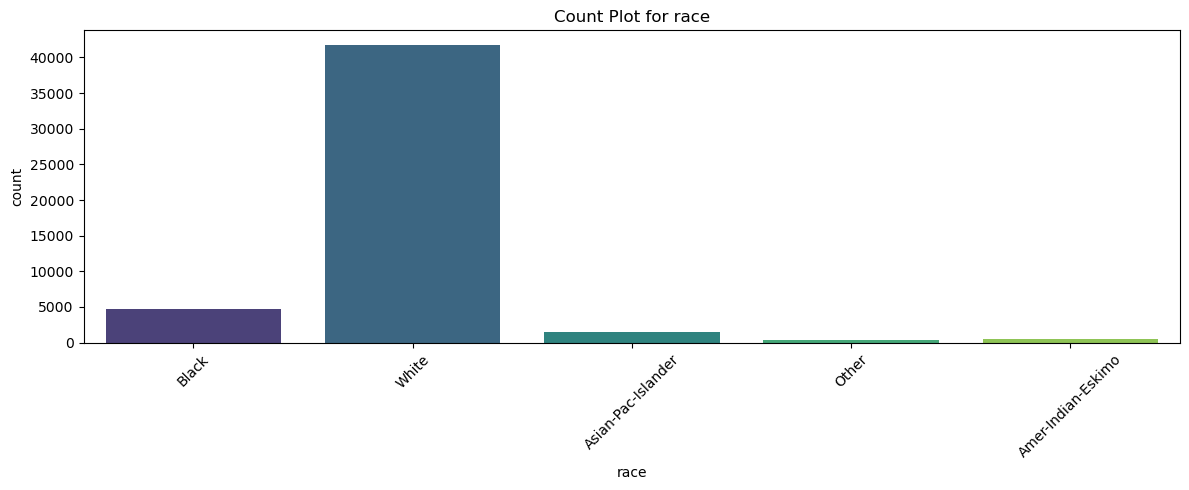

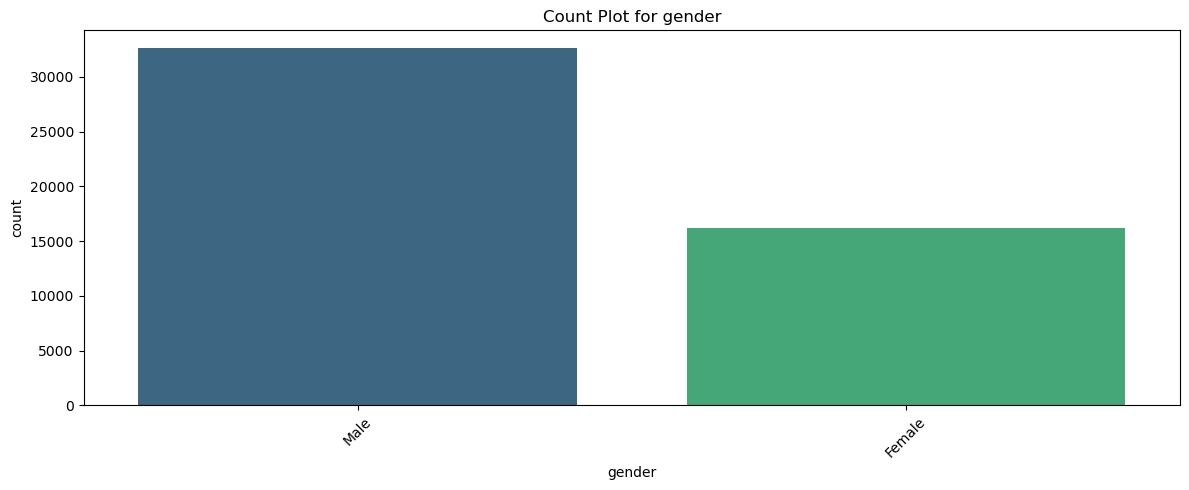

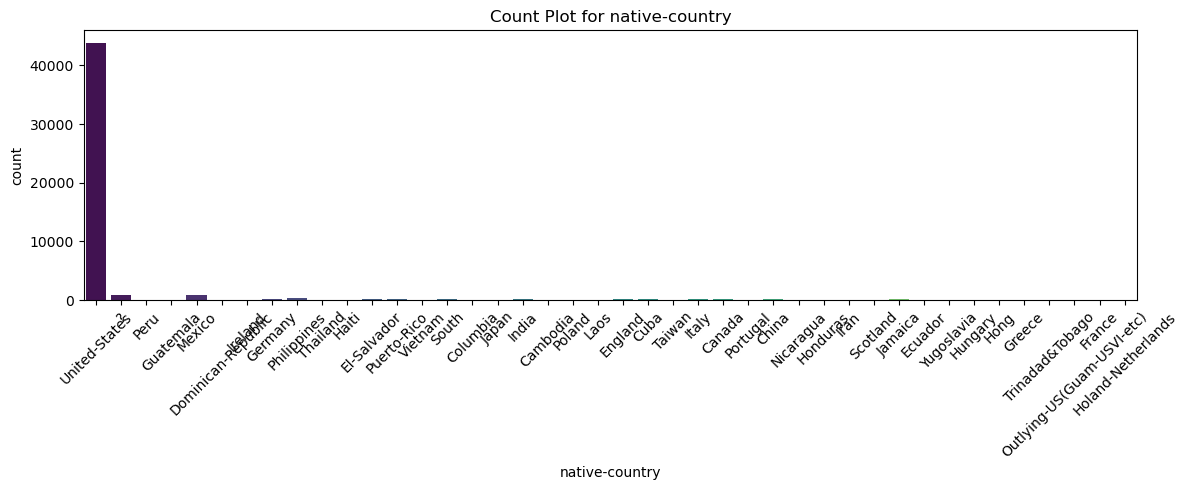

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_features = ['workclass', 'education', 'marital-status', 'occupation', 
                'relationship', 'race', 'gender', 'native-country']  

for feature in cat_features:
    plt.figure(figsize=(12, 5))
    sns.countplot(data=dataset, x=feature, palette="viridis")
    plt.title(f'Count Plot for {feature}')
    plt.xticks(rotation=45)  
    plt.tight_layout()       
    plt.show()


## split data_set

## preprocessing and modeliing 

In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier

cat_features = ['workclass', 'education', 'marital-status', 'occupation', 
                'relationship', 'race', 'gender', 'native-country']
num_features = ['age', 'fnlwgt', 'educational-num', 'hours-per-week']

X = dataset.drop(columns=['income']) 
y = dataset['income'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


scaler = RobustScaler()
X_train_num_scaled = scaler.fit_transform(X_train[num_features])
X_test_num_scaled = scaler.transform(X_test[num_features])

encoder = OneHotEncoder(sparse_output=False, drop='first')  # One-hot encoding
X_train_cat_encoded = encoder.fit_transform(X_train[cat_features])
X_test_cat_encoded = encoder.transform(X_test[cat_features])

X_train_processed = np.hstack((X_train_num_scaled, X_train_cat_encoded))
X_test_processed = np.hstack((X_test_num_scaled, X_test_cat_encoded))

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_resampled, y_train_resampled)

y_pred = knn_model.predict(X_test_processed)

from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

print("KNN Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      7422
           1       0.50      0.79      0.61      2336

    accuracy                           0.76      9758
   macro avg       0.71      0.77      0.72      9758
weighted avg       0.82      0.76      0.77      9758

Confusion Matrix:
[[5551 1871]
 [ 479 1857]]
Accuracy: 0.7592
F1 Score: 0.7744
